In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline


import seaborn as sns

plt.style.use('fivethirtyeight')

from bs4 import BeautifulSoup
import requests

In [2]:
data = pd.read_csv('../data/data_file.csv')
movies = data

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Dropping unwanted columns, only keeping full length movies, creating score metric

In [3]:
#drop cols with very little data
movies = data.drop(['region', 'language', 'attributes', 'endYear','Unnamed: 0', 
                  'types','isOriginalTitle', 'primaryTitle', 'isAdult', 'ordering'], axis=1)
#drop rows with Nan values
movies = movies.dropna()

#only keep full length movies, no TV episodes, no short films, no video games, etc
movies = movies[movies['titleType'] == 'movie']

#making two cols integers instead of floats
movies.startYear = movies.startYear.astype(int)
movies.runtimeMinutes = movies.runtimeMinutes.astype(int)

#creating a score metric that places movies voted on more higher than movies voted on less
movies['score'] = (movies['averageRating']-5.0) * movies['numVotes']

In [4]:
movies['writers'] = movies['writers'].str.split(',', expand=True)
movies['directors'] = movies['directors'].str.split(',', expand=True)
movies['genres'] = movies['genres'].str.split(',', expand=True)
movies.to_csv('../data/movies.csv')

## Functions to make it easier to get information

In [5]:
def frequency_dict(pandas_series):
    out_dict = {}
    for x in pandas_series:
        if x in out_dict:
            out_dict[x] +=1
        else:
            out_dict[x] = 1
    return {k: v for k, v in sorted(out_dict.items(), key=lambda item: item[1], reverse=True)}

In [6]:
#all the writers, directors, and title are identified by a unique ID in the IMDB database
#ex: Martin Scorsese is identified as 'nm0000217'
#this is a function that takes in a unique ID,
# web scrapes that IMDB url for a speficic html tag that 
#contains the person's/movie's name
def get_name(ID):
    url = 'https://www.imdb.com/name/'+ ID
    r  = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data, "html.parser")
    mydivs = soup.find("span", {"class": "itemprop"})
    return str(mydivs.contents[0])

In [7]:
def homemade_pie(dictionary, title, color, fig_w=13, fig_h=10):
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    names = []
    counts = []
    for name, count in zip(dictionary.keys(), dictionary.values()):
        names.append(get_name(name))
        counts.append(count)
    
    out = ax.pie(counts, labels=names,autopct='%1.1f%%', shadow = True)
    ax.set_title(title)

    return out

def homemade_pie_with_name(dictionary, title, color, fig_w=13, fig_h=10):
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    names = []
    counts = []
    for name, count in zip(dictionary.keys(), dictionary.values()):
        names.append(name)
        counts.append(count)
    
    out = ax.pie(counts, labels=names, autopct='%1.1f%%', shadow= True)
    ax.set_title(title)

    return out

## Finding notables

Top x movies, bottom x movies, most occuring writers/directors, best years, worst years

In [8]:
GLOBAL_TOP = 15

In [9]:
top = movies.sort_values(by=['score'], ascending=False).head(GLOBAL_TOP)
bot = movies.sort_values(by=['score'], ascending=True).head(GLOBAL_TOP)

In [10]:
top_directors = frequency_dict(top['directors'])
top_writers = frequency_dict(top['writers'])

In [11]:
most_frequent_genres = frequency_dict(top['genres'])

In [12]:
bot_directors = frequency_dict(bot['directors'])
bot_writers = frequency_dict(bot['writers'])

In [13]:
best_years = frequency_dict(top['startYear'])
worst_years = frequency_dict(bot['startYear'])

## Official EDA Graphs and tables

In [14]:
top

,id,title,titleType,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,score
78380,tt0111161,The Shawshank Redemption,movie,The Shawshank Redemption,1994,142,Drama,nm0001104,nm0000175,9.3,2274619.0,9780861.7
184735,tt0468569,The Dark Knight,movie,The Dark Knight,2008,152,Action,nm0634240,nm0634300,9.0,2236760.0,8947040.0
263612,tt1375666,Inception,movie,Inception,2010,148,Action,nm0634240,nm0634240,8.8,1996195.0,7585541.0
78182,tt0110912,Pulp Fiction,movie,Pulp Fiction,1994,154,Crime,nm0000233,nm0000233,8.9,1777018.0,6930370.2
77420,tt0109830,Forrest Gump,movie,Forrest Gump,1994,142,Drama,nm0000709,nm0343165,8.8,1751980.0,6657524.0
49171,tt0068646,The Godfather,movie,The Godfather,1972,175,Crime,nm0000338,nm0701374,9.2,1569263.0,6590904.6
85540,tt0167260,The Lord of the Rings: The Return of the King,movie,The Lord of the Rings: The Return of the King,2003,201,Action,nm0001392,nm0866058,8.9,1601646.0,6246419.4
85541,tt0167261,The Lord of the Rings: The Two Towers,movie,The Lord of the Rings: The Two Towers,2002,179,Action,nm0001392,nm0866058,8.7,1447361.0,5355235.7
196738,tt0816692,Interstellar,movie,Interstellar,2014,169,Adventure,nm0634240,nm0634300,8.6,1443857.0,5197885.2
261815,tt1345836,The Dark Knight Rises,movie,The Dark Knight Rises,2012,164,Action,nm0634240,nm0634300,8.4,1477591.0,5023809.4


In [15]:
bot

,id,title,titleType,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,score
246204,tt1213644,Disaster Movie,movie,Disaster Movie,2008,87,Comedy,nm0294997,nm0294997,1.9,86122.0,-266978.2
319545,tt2322441,Fifty Shades of Grey,movie,Fifty Shades of Grey,2015,125,Drama,nm0853374,nm0545150,4.1,292968.0,-263671.2
195298,tt0799949,Epic Movie,movie,Epic Movie,2007,86,Adventure,nm0294997,nm0294997,2.4,100769.0,-261999.4
410058,tt5988370,Reis,movie,Reis,2017,108,Biography,nm1760911,nm8890606,1.4,72146.0,-259725.6
222855,tt1073498,Meet the Spartans,movie,Meet the Spartans,2008,86,Comedy,nm0783536,nm0294997,2.8,100520.0,-221144.0
93481,tt0185183,Battlefield Earth,movie,Battlefield Earth,2000,118,Action,nm0002337,nm0541720,2.5,75147.0,-187867.5
146411,tt0327554,Catwoman,movie,Catwoman,2004,104,Action,nm0685759,nm0004170,3.4,108744.0,-173990.4
227414,tt1098327,Dragonball Evolution,movie,Dragonball Evolution,2009,85,Action,nm0939128,nm0708870,2.5,69177.0,-172942.5
435889,tt7221896,Cumali Ceber: Allah Seni Alsin,movie,Cumali Ceber: Allah Seni Alsin,2017,100,Comedy,nm9107963,nm9107965,1.0,37579.0,-150316.0
204702,tt0938283,The Last Airbender,movie,The Last Airbender,2010,103,Action,nm0796117,nm0796117,4.0,149313.0,-149313.0


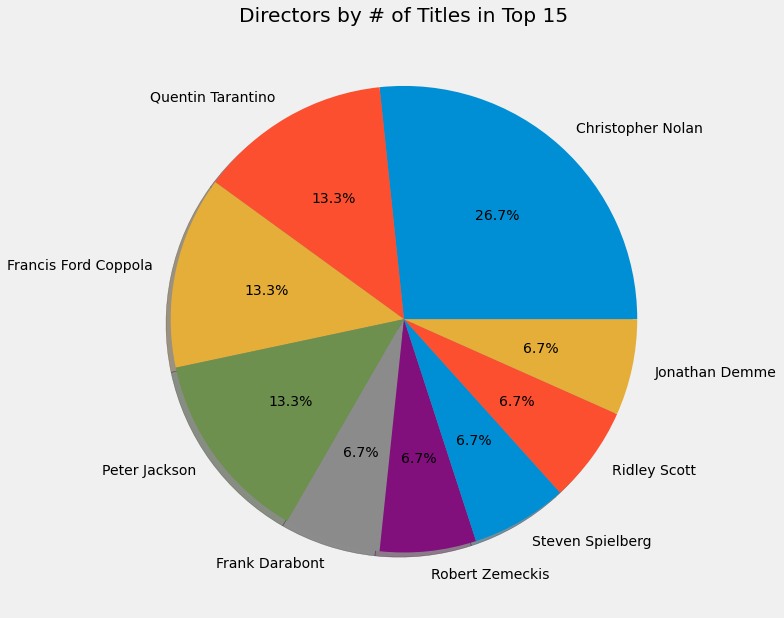

In [16]:
homemade_pie(top_directors, 'Directors by # of Titles in Top {}'.format(GLOBAL_TOP), '#F58426');

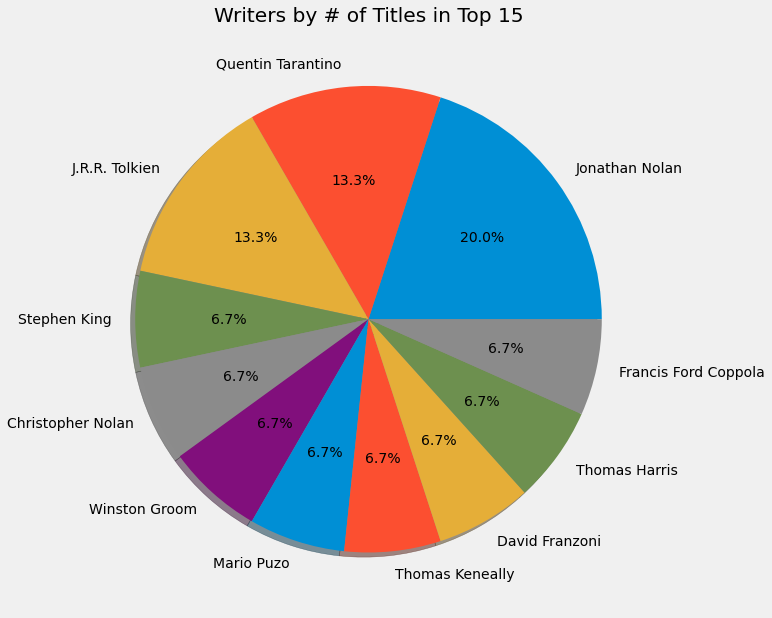

In [17]:
homemade_pie(top_writers, 'Writers by # of Titles in Top {}'.format(GLOBAL_TOP), '#552583');

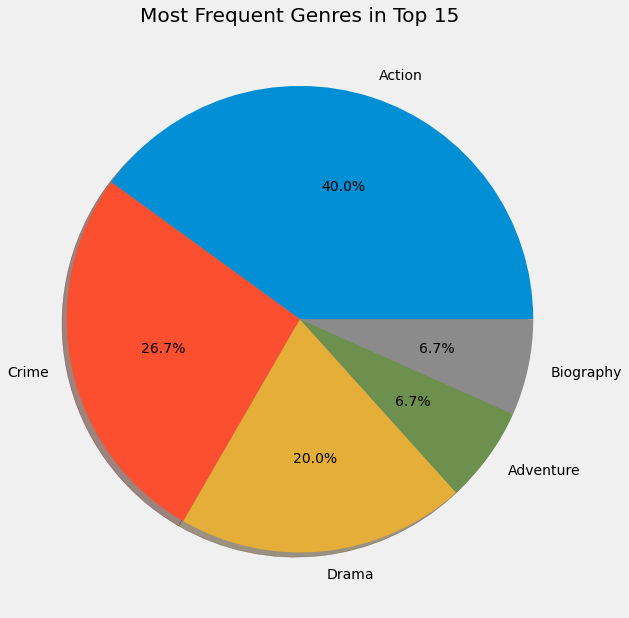

In [18]:
homemade_pie_with_name(most_frequent_genres, 'Most Frequent Genres in Top {}'.format(GLOBAL_TOP), '#00788C');

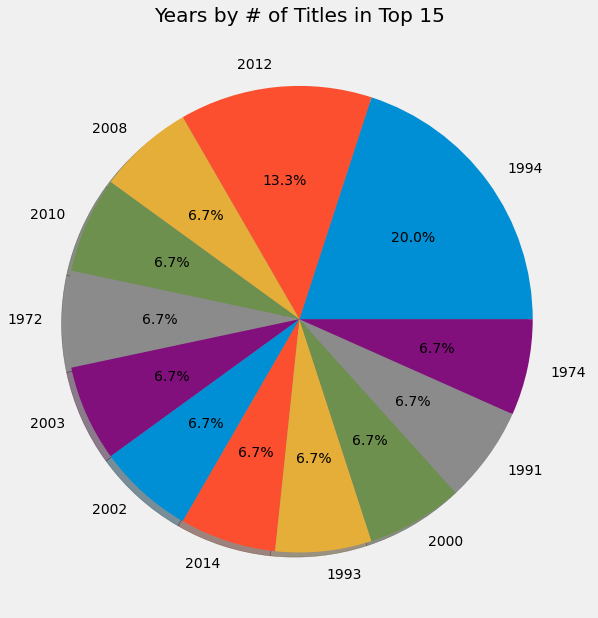

In [19]:
homemade_pie_with_name(best_years, 'Years by # of Titles in Top {}'.format(GLOBAL_TOP), '#DB3EB1');

Text(0.5, 1.0, 'Scores of Titles')

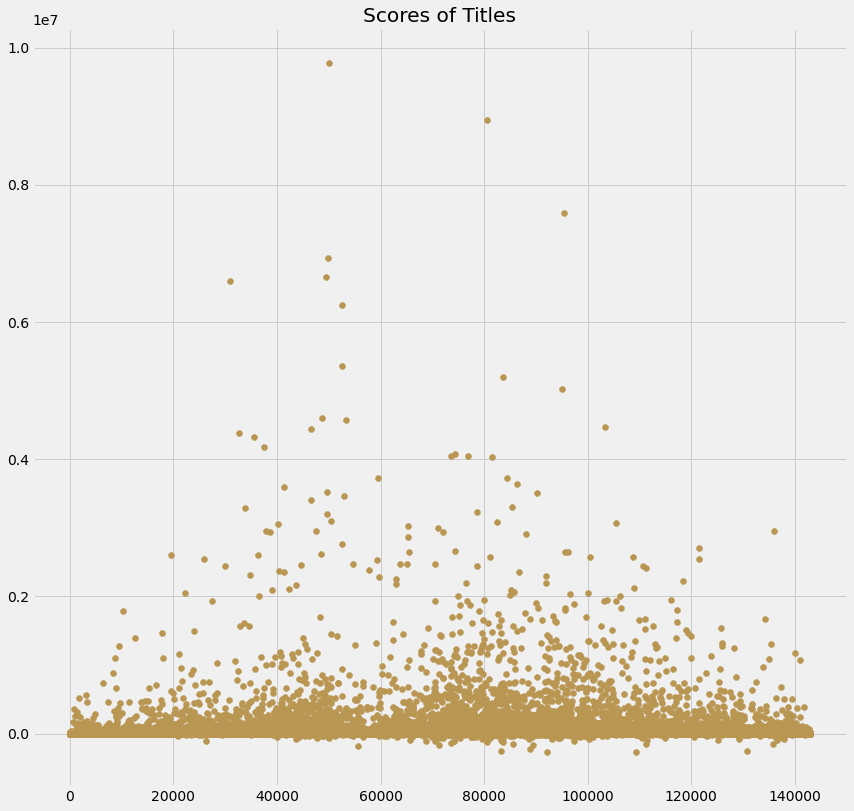

In [20]:
fig, ax = plt.subplots(figsize=(13, 13))
x = list(range(movies['score'].size))
y = movies['score']
ax.scatter(x, y, color='#BA9653');
ax.set_title('Scores of Titles')